|평가문항|	상세기준|
|---|---|
|1. Baseline을 참고하여 진행하였는가?|EDA(탐색적 데이터 분석), 데이터 전처리, 검증 데이터 분리 과정을 수행 하였는가?|
|2. 머신러닝 지도학습(회귀) 모델을 잘 사용하였는가?|지도학습 회귀 모델을 3가지 이상 사용하여 MSE 결과를 확인해 보았는가?|
|3. Baseline score(MSE 51,xxx) 보다 좋은 성능 향상을 하였는가?|Baseline score(MSE 51,xxx) 보다 좋은 성능을 보여준 회귀 모델은 무엇이며, MSE score는 몇 점인가?|

# Airbnb (New York City)
- 미국 NYC Airbnb 목록(2019)
- 프로젝트 목적: 가격 예측(price)
- 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
- 평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)
- <참고> : 6. 지도학습(회귀) 노드의 6-8. 평가(회귀) 스텝에서 복습하실 수 있습니다.
- 데이터 출처 바로가기 / License CC0: Public Domain /https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [ ]:
#구글 드라이브 파일 접근 코랩에서 진행할 때..
#학습 과정 시간은 나쁘지 않은 데 하이퍼파라미터 튜닝할 때 시간 많이 걸리니 GPU로 변경하고 시작하자 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 호출하기

# google drive path : /content/drive/MyDrive/Colab Notebooks/aiffel/data/
# local path : D:\Google_Drive_4juneko\Colab Notebooks\aiffel
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/y_test.csv')

In [ ]:
#LMS에서
# import pandas as pd
# train = pd.read_csv('/aiffel/data/train.csv')
# test = pd.read_csv('/aiffel/data/test.csv')
# y_test = pd.read_csv('/aiffel/data/y_test.csv')

## EDA
- shape  
- head  
- info  
- isnull  
- hist  

In [ ]:
train.shape, test.shape, y_test.shape
#train, test의 사이즈가 약 4:1 전체의 20%를 test로.. 
#test, y_test의 행 수가 값음. 같아야 함.

((39116, 16), (9779, 15), (9779, 1))

In [ ]:
display(train.head(2))
display(test.head(2))
display(y_test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


,price
0,80
1,190


In [ ]:
train['last_review'].unique()
# 2013년 거도 있네. 다는 안보이지만. 시각화 해? 말아?

array(['2019-01-01', '2019-06-30', '2019-02-07', ..., '2017-01-28',
       '2013-05-31', '2013-12-25'], dtype=object)

In [ ]:
train.info(), test.info(), y_test.info()
#test에는 price 열이 없음. y_test는 열이 하나뿐이라 구지 볼 필요는 없었지만 타입 확인했음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

(None, None, None)

In [ ]:
train.isnull().sum()
#리뷰 관련 데이터에 결측치가 있음.  20% 정도. number_of_reviews의 분포를 볼 필요가 있겠음. 많네....
#name, host_name에도 10개 남짓. 사용하지 않음.

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
test.isnull().sum()
#리뷰 없는 곳 지우기. 20%나 되는데 지워도 될까? 
#허위이거나 신규 매물.. 기존 거래 매물을 바탕으로 예측하는 목적에 맞지 않음. 지우기로 결정!! 

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

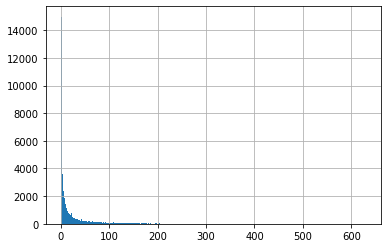

In [ ]:
train['number_of_reviews'].hist(bins=300)


In [ ]:
# number_of_reviews
train['number_of_reviews'].value_counts() 
#리뷰 없는 곳이 7994 리뷰 관련 데이터 빈칸인 수랑 같음. 예상했지만 더블 체크
#허위 매물 가능성이 높아 7994 개는 없애는 것이 좋겠음. 

0      7994
1      4219
2      2763
3      2004
4      1593
       ... 
347       1
264       1
375       1
360       1
282       1
Name: number_of_reviews, Length: 379, dtype: int64

In [ ]:
train['price'].value_counts().sort_index()

0         9
10       12
11        3
12        3
13        1
         ..
7703      1
8000      1
8500      1
9999      3
10000     2
Name: price, Length: 645, dtype: int64

<Axes: >

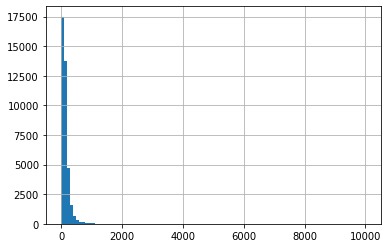

In [ ]:
train['price'].hist(bins=100) #bins : 가로축 구간의 갯수 지정하는 거임. 최소 최대 값 차이가 10000이므로 10씩 자른 거임? 

In [ ]:
# target(describe)
train['price'].describe()
#0이 있어? 이것도 지우는 것이 좋겠음.
#75%가 175인데 10000이 최대... 2000이상 데이터도 지울까 말까? 비싼 곳도 있겠지...

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# 피처(host_id)
train['host_id'].value_counts()  #

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

<Axes: >

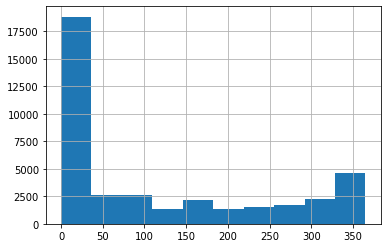

In [ ]:
train['availability_365'].hist(bins=10) 

In [ ]:
train['availability_365'].value_counts() 
#가능한 날이 없는 곳이 14000개나 됨. 허위거나 방이 매우 잘 나간거니?
#리뷰 빈칸인 곳 지우고 다시 한 번 체크하면 7994가 확실히 허위매물인지 알 수 있을 거 같음.

0      14007
365     1050
364      393
1        326
89       308
       ...  
195       20
183       18
181       17
196       17
202       15
Name: availability_365, Length: 366, dtype: int64

## Data Preprocessing
- last_review 삭제 (숫자형이 아니어서?) 
- review isnull 지우기. =>  허위 매물이거나 신규 매물이므로 기존 거래 가격을 바탕으로 가격 예측하는 목표에 어긋남.  
- price == 0 지우기 : 허위매물?..

### 리뷰 관련 전처리
- 결측치 행 삭제 
    - last_review이나 reviews_per_month의 결측치 행 제거(같은 결과)
    - train = train['last_review'].dropna().reset_index(drop=True)
    - test 파일은 y_test와 같이 진행해야 함. (행을 지우는 거라서..)
    - 결측치 행 index를 리스트로 만들어 특정행 지우기

- 숫자가 아니었던 'last_review' 열 지우기
    - train = train.drop('last_review', axis=1)
    - test = test.drop('last_review', axis=1)


In [ ]:
# 결측치를 지우는 데 test와 y_test의 같은 행을 지워야 하므로 test의 지울 행의 index를 저장하고 y_test도 같은 행을 지울 거임.
na_index =[]
test['last_review']= test['last_review'].fillna(0)
na_index = test.loc[test.last_review == 0].index
na_index

Int64Index([  10,   13,   14,   16,   31,   32,   36,   40,   50,   61,
            ...
            9742, 9743, 9750, 9752, 9753, 9756, 9757, 9761, 9772, 9777],
           dtype='int64', length=2058)

In [ ]:
#test의 last_review의 결측치 지움
test = test.drop(na_index)
test.shape

(7721, 15)

In [ ]:
#test의 last_review의 결측치와 같은 행을 y_test에서 지움.
y_test = y_test.drop(na_index)
y_test.shape
#같은 행을 지우니 행 수 같음.

(7721, 1)

In [ ]:
#결측치가 있는 행 지우기(train) 결측치 지우는 건 여러 방법이 있음.
# train = train['last_review'].dropna().reset_index(drop=True)
train = train.dropna(subset=['last_review'])
train.shape
#((39116, 16), (9779, 15)) : 지우기 전.

(31122, 16)

In [ ]:
train['availability_365'].value_counts()
#0인 것이 4000이 줄었네 7944의 반. 365인 것이 400감소. 
#리뷰가 없는데 가능한 날이 없다!? 확실히 이상한 거 맞음. 
#나머지 4000천개는? 허위가 아닌 건가?

0      10139
365      679
1        291
364      244
5        229
       ...  
183       18
195       18
196       16
181       15
202       14
Name: availability_365, Length: 366, dtype: int64

In [ ]:
train

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
5,15523281,1 bedroom to yourself in Midtown Manhattan!,96595601,Tristan,Manhattan,Midtown,40.75966,-73.96313,Entire home/apt,135,3,21,2019-05-12,0.67,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,925240,Artist Loft - Union Square,4976428,Jonathan,Manhattan,East Village,40.73194,-73.98939,Entire home/apt,295,7,92,2019-06-24,1.23,1,316
39110,4649627,"Spacious 1 BR, En Suite in Brownstone!",9492212,Emily And Joel,Brooklyn,Park Slope,40.67020,-73.97885,Private room,135,2,88,2018-12-31,1.60,4,0
39112,29754544,"Comfortable- JFK,LGA Best Value",223846870,Shared Stay-JFK The Hugh Suite,Queens,Springfield Gardens,40.66102,-73.77035,Private room,50,1,57,2019-06-21,7.28,3,342
39114,531258,1 BR Village - 30 day+ stay,2609535,Alexandra,Manhattan,Greenwich Village,40.73110,-73.99913,Entire home/apt,165,30,19,2018-10-15,0.23,1,259


In [ ]:
train.isnull().sum()
#결측치 모두 해결

id                                 0
name                               6
host_id                            0
host_name                         13
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
test.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         3
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
train['number_of_reviews'].value_counts() 
#리뷰 없는 곳이 다 지워졌음.

1      4219
2      2763
3      2004
4      1593
5      1304
       ... 
286       1
309       1
306       1
298       1
282       1
Name: number_of_reviews, Length: 378, dtype: int64

#### 처리 후 의견
- 결측치 행을 모두 제거하였는데 사실 좋은 방법은 아닌 거 같음.  
- 결측치 데이터가 전체의 20%에 달하기 때문에 적은 양이 아님.
이것이 TIP에서 처럼 0으로 바꾸는 것이 맞는 건가? 물론 결측치 행의 리뷰수가 0이었기 때문에 0으로 대체하는 것이 맞는 거 같음.  

### price 이상치 제거
- price == 0 인 거 지움. 9개 뿐이어서 큰 영향은 없을 거 같음.
- price > 1000 인 것이 상대적으로 다른 것들과 차이가 많아 지울까 고민했지만 비싼 방도 있을 거라 이상치가 아닐 수 있는 가능성도 있기 때문에 결론적으로는 안지우는 것이 맞는 거 같음(바롬 퍼실님 조언) 
- ChatGPT한테 물어봤더니 이상치는  Z-score, IQR 등으로 처리하라는데 아직, 모르니깐... 
- 예측 모델에서는 변수들의 스케일이 다르면 예측 성능이 낮아질 수 있습니다. 따라서, 변수들의 스케일을 조정하는 것이 필요할 수 있습니다. 이 때는 Min-Max scaling, Standard scaling 등의 방법을 사용할 수 있습니다. 여기서는 Min-Max scaling을 함. (by ChatGPT, TIP)  
- 변수가 아니라 Target도 scaling이 필요할 거 같음. price의 단위가 많이 큰 것도 있어서 scaling이 필요하긴 하겠군... 그렇지만 안했음.

In [ ]:
train['price'].value_counts().sort_index()

0        9
10       8
11       1
12       1
13       1
        ..
7500     1
8000     1
8500     1
9999     2
10000    1
Name: price, Length: 560, dtype: int64

In [ ]:
# #price의 이상치 행 지우기 이거 왜 안되지?
# cond = (train['price'] == 0) | (train['price'] > 1000)
# train[cond].index
# # train = train.drop(train[cond].index, axis = 0, inplace = True )

In [ ]:
#price의 이상치 지움.
# train = train[(train.price != 0) & (train.price <=1000)].reset_index(drop=True)
train = train[train.price != 0].reset_index(drop=True)
# train =train.reset_index()
# train = train[train.price <=1000]
train.shape
#이상치라고 지우는 거보다 정규화를 하는 것이 혹시 모를 이상치가 아닌 값을 버릴지 않을 수 있음. (Tip 파일에서 수행함.)

(31113, 16)

### 범주형 데이터 전처리
- Tip을 참고하여 범주형 제거하지 않은 데이터 프레임 생성
- 수치형과 범주형을 분리하고
- 범주형을 인코딩하여 합침  
- 결과적으로 범주형을 제거하였을 때보다 약 10% 모델 성능 약 10% 좋아짐.

In [ ]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [ ]:
train.shape

(31113, 15)

In [ ]:
# 수치형 피처와 아닌 것을 분리 
cols = [
        'host_id',
        'latitude', 
        'longitude', 
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]
cols2 = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
]
n_train = train[cols].copy()
n_test = test[cols].copy()
c_train = train[cols2].copy()
c_test = test[cols2].copy()

In [ ]:
n_train.shape, n_test.shape, c_train.shape, c_test.shape

((31113, 8), (7721, 8), (31113, 3), (7721, 3))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(1))

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.34406,0.727367,0.539318,0.001601,0.003185,0.001368,0.003067,0.0


In [ ]:
#인코딩 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cols2:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])

display(c_train.head(1))

,neighbourhood_group,neighbourhood,room_type
0,2,93,1


In [ ]:
# 분리한 데이터 다시 합침
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
train.head()

(31113, 11) (7721, 11)


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.344060,0.727367,0.539318,0.001601,0.003185,0.001368,0.003067,0.000000,2,93,1
1,0.178984,0.625625,0.478445,0.000801,0.100318,0.028552,0.003067,0.717808,2,94,0
2,0.001598,0.550834,0.449354,0.047238,0.000000,0.003248,0.000000,0.000000,2,207,0
3,0.013055,0.455423,0.579361,0.002402,0.378981,0.049239,0.003067,0.002740,1,13,0
4,0.352737,0.623876,0.529308,0.001601,0.031847,0.011284,0.000000,0.000000,2,126,0


## Train Test Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((24890, 11), (6223, 11), (24890,), (6223,))

## Machine Learning
- 6가지 모델로 학습

### 선형회귀

In [ ]:
# 선형회귀
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

21479.46593972052

In [ ]:
# test 데이터 예측 및 평가
pred = model.predict(test)
mean_squared_error(y_test, pred)

27097.122936510073

### 릿지회귀

In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

21480.44173322879

In [ ]:
# test 데이터 예측 및 평가
pred = model.predict(test)
mean_squared_error(y_test, pred)

27098.404852076383

### 라쏘 회귀

In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

21793.207002100342

In [ ]:
# test 데이터 예측 및 평가
pred = model.predict(test)
mean_squared_error(y_test, pred)

27310.941288579746

### 엘라스틱넷 회귀

In [ ]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

23524.940243428584

In [ ]:
# test 데이터 예측 및 평가
pred = model.predict(test)
mean_squared_error(y_test, pred)

29090.98960710519

### 랜덤포레스트

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

23563.492238936207

In [ ]:
# test 데이터 예측 및 평가
pred = model.predict(test)
mean_squared_error(y_test, pred)

32852.347870172256

### XGboost

In [ ]:
# Xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

36425.22851158986

In [ ]:
# test 데이터 예측 및 평가
pred = model.predict(test)
mean_squared_error(y_test, pred)

50363.48755056846

## Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### XGboost

In [ ]:
# 하이퍼파라미터
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }
# 찾는 최적의 값의 범위를 찾는 것은 경험

In [ ]:
# GridSearchCV
model = XGBRegressor()
grid = GridSearchCV(model, params, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [ ]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}

In [ ]:
# 하이퍼파라미터 튜닝
model = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 200,
    subsample =0.7,
    random_state=2022
)
model.fit(X_train, y_train)
pred = model.predict(test)
mean_squared_error(y_test, pred)
#베스트 하이퍼파라미터 찾는데 약 3분 걸렸는데 약 20000줄었네  

30858.03957548674

In [ ]:
#  Randomized Search
model = XGBRegressor()
grid = RandomizedSearchCV(model, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X_train, y_train)
#1분 조금 넘게 걸림

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [ ]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}

In [ ]:
# 하이퍼파라미터 튜닝
model = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 200,
    subsample =0.7,
    random_state=2022
)
model.fit(X_train, y_train)
pred = model.predict(test)
mean_squared_error(y_test, pred)
#같은 값을 찾음 .   

30858.03957548674

## Evaluation
### test 데이터 예측 및 평가
모델 만들고 바로 다음셀에서 각각 평가함
- 범주형 포함, price 0값 제외 기준으로 MSE는 선형회귀와 릿지회귀에서 가장 작은 값을 얻음  (27000정도)
- 범주형이 있는 모델은 튜닝 전에 Xgboost의 성능이 다른 모델에 비해 많이 낮음.(60% 정도)
- Xgboost 모델에서 하이퍼파라미터 튜닝으로 성능이 약 40% 향상됨.   
<br/>
- 범주형을 제거한 XGboost는 하이퍼 파라미터 튜닝 후에 엘라스틱회귀와 비슷한 값을 얻음.  
<br/>  
----  
    

  



|모델|선형회귀|릿지회귀|라쏘회귀|엘라스틱넷회귀|램덤포레스트|XGboost|
|----|-----|----|----|----|----|----|
|MSE(범주형제외, 0<price<1000)|29888.807951451472|29891.815941458157|30543.077198293304|30876.789706196945|26696.27370543971|26946.6137514007|
|GridSearchCV|---|---|---|---|---|26646.054297479976|
|Randomized Search|---|---|---|---|---|26646.054297479976|
|MSE(범주형 제외, 0<price)|29925.247459712293|29924.5914610508|30454.4774978721|30904.003610174812|33240.8671468074|35722.213781520084|
|GridSearchCV|---|---|---|---|---|31046.15531193618|
|Randomized Search|---|---|---|---|---|30113.706353657366|
|MSE(범주형 포함, 0<price)|27097.122936510073|27098.404852076383|27310.941288579746|29090.98960710519|32852.347870172256|50363.48755056846|
|GridSearchCV|---|---|---|---|---|30858.03957548674|
|Randomized Search|---|---|---|---|---|30858.03957548674|

---
<br/>
- 수치형만 있는 데이터프레임의 코드 실행은 수정으로 없어졌음. 결과만 기록함.

## Extra Work
- 참고  
https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb
- 예전에는 kaggle 봐도 무슨 말인지 모르겠더니 오늘은 무슨 의미인지 어떤 코드를 복사하면 어떤 것이 구현이 될지 이제 조금 알 거 같음.

<br/>
<br/>
Thank you for Everything  🙂

✈ I want to go somewhere

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

train_price = pd.concat([train, target], axis=1) #price를 target으로 빼놨어서 다시 붙였음.

### 경위도에 따른 가격 그래프 

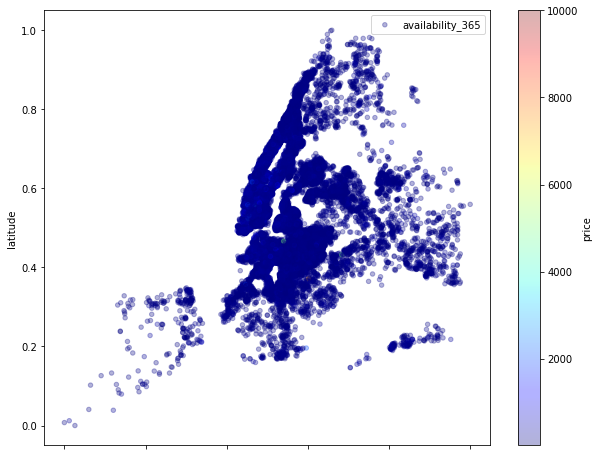

In [ ]:
viz_4=train_price.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.3, figsize=(10,8))
viz_4.legend()

#정규화가 안되어서 그런가 높은 값들 다 숨어버렸네 뉴욕의 지도를 그려버렸다.  
#그러고 보면 많이 비싼 방들은 따로 처리해야 했음. 가격 차이가 많이 남. 기준 이하와 이상(저가 고가 방)을 따로 취급하는 것이 낫겠음.
#아무튼 2019년 전의 데이터라 지금은 많이 비싸졌겠지.. ㅜㅜ 

### 각 변수 간의 상관관계 

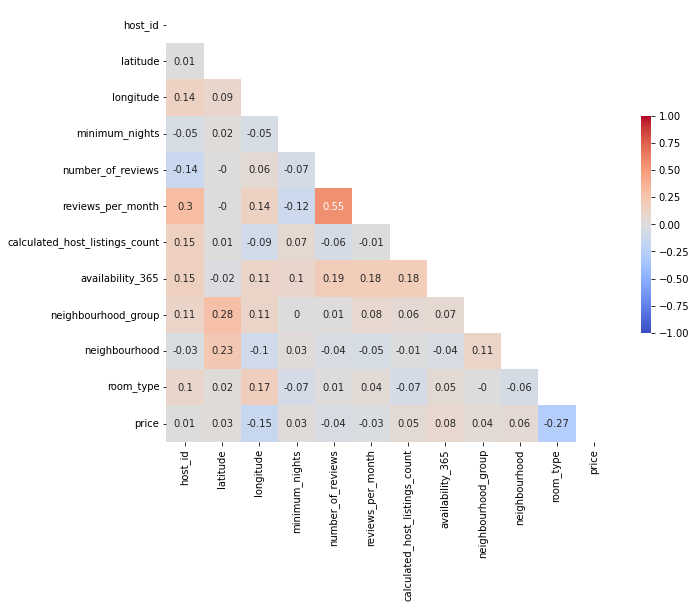

In [ ]:
import numpy as np

fig, ax = plt.subplots( figsize =(10,8))
cor_tab =train_price.corr().apply(np.round, decimals=2)
# Palette
pal = sns.color_palette("coolwarm", 10000)

mask = np.zeros_like(train_price.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True    #윗 줄과 함께 그래프 반만 보이기

sns.heatmap(
    data=cor_tab, 
    annot=True, 
    cmap=pal, 
    mask=mask,
    vmin=-1, 
    center=0, 
    vmax=1, 
    cbar_kws={"shrink": .5}
    )
plt.show()
#네이버후드와 경위도가 상관관계 있는 것은 당연.  
#호스트와 리뷰수와 관계가 있음. 특정 호스트에 따라 장사가 잘 되고 안되고 하나봄. 
#가격과 상관관계가 상대적으로 높은 건 룸타입과 경도였음.
#별점 데이터가 있었으면 좋았을 뻔... 중심가의 방은 가격을 맞추려고 엉망일 수도..